In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv")

In [3]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Data cleaning

In [4]:
data1=data.drop(['Unnamed: 0'],axis='columns')

In [5]:
data1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
data1.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data1.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data1['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

# relation TV and sales

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

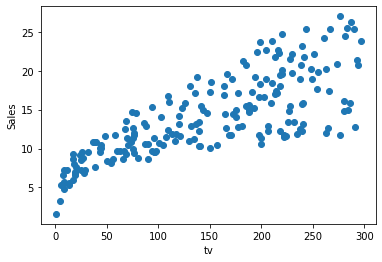

In [10]:
x=data1['TV']
y=data1['Sales']
plt.scatter(x,y)
plt.xlabel('tv')
plt.ylabel('Sales')


# Radio vs Sales

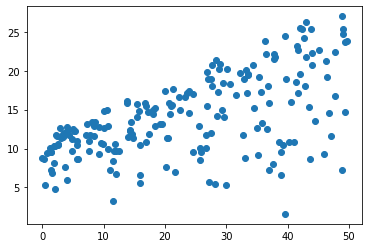

In [11]:
radio=data1['Radio']
sale1=data1['Sales']
plt.scatter(radio,sale1)
plt.show()

# news vs sales

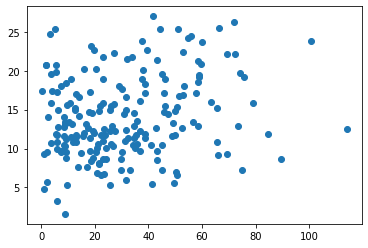

In [12]:
news=data1['Newspaper']
sale2=data1['Sales']
plt.scatter(news,sale2)
plt.show()

In [13]:
data1.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

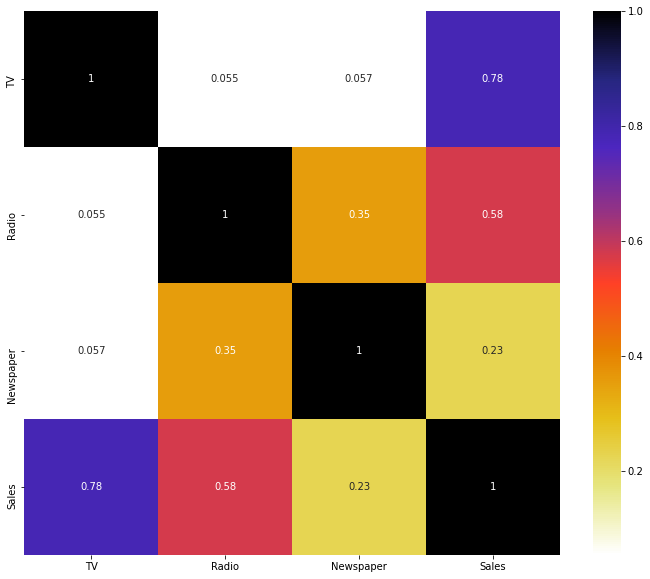

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=data1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [15]:
X_train=data1.drop(['Sales'],axis='columns')
X_train
y_train=data1['Sales']

In [16]:
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j]))>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
correlation(X_train,0.7)

set()

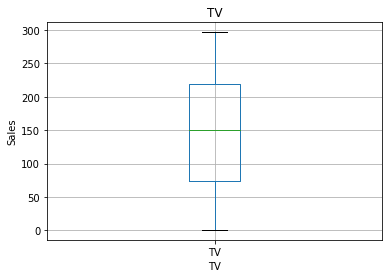

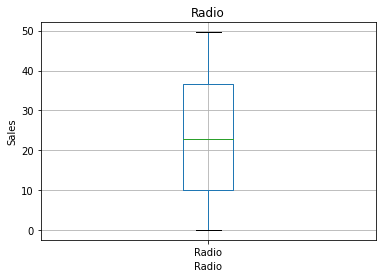

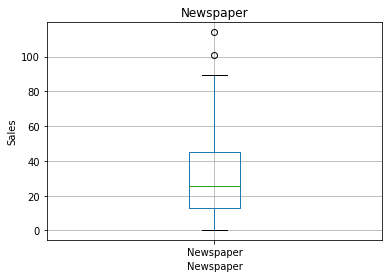

In [18]:
# for feature in continuous_feature:
#     data=home_data.copy()
#     data.boxplot(column=feature)
#     plt.xlabel(feature)
#     plt.ylabel("SalePrice")
#     plt.title(feature)
#     plt.show()



for feature in X_train.columns:
    data=data1.copy()
    data.boxplot(column=feature)
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(feature)
    plt.show()

In [19]:
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(df['cgpa'])
import seaborn as sns

<Figure size 1152x360 with 0 Axes>

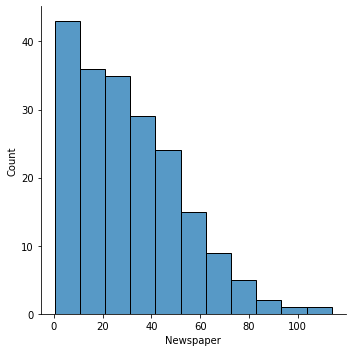

In [20]:
plt.figure(figsize=(16,5))
sns.displot(X_train['Newspaper'])
plt.show()

In [25]:

X=data1.drop(['Sales'],axis='columns')

In [27]:
y=data1['Sales']

In [28]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape

(160, 3)

In [32]:
X_test.shape

(40, 3)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regressior=LinearRegression(fit_intercept=True)

In [36]:
regressior.fit(X_train,y_train)

LinearRegression()

In [41]:

print(f"linear coefficients :{regressior.coef_}")
print(f"Intercept :{regressior.intercept_}")

linear coefficients :[0.04472952 0.18919505 0.00276111]
Intercept :2.9790673381226274


In [42]:
# y_pred = regressor.predict(X_test)
y_pred=regressior.predict(X_test)

In [43]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

# calculation confusion matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [49]:

import numpy as np
from sklearn import metrics
print("Root mean squared Error :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean squared Error : 1.7815996615334502


In [50]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test,y_pred)

0.899438024100912